In [72]:
#importing libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.arima.model import ARIMA

In [53]:
#loading data
stores = pd.read_csv('stores.csv')
rev = pd.read_csv('revenue.csv')
rf = pd.read_csv('regional_factors.csv')

In [54]:
stores.head(2)

,store,type,size
0,1,A,151115
1,2,A,202107


In [55]:
rev.head(2)

,store,department,date,revenue
0,1,1,2/5/16,24424.50
1,1,1,2/12/16,45539.49


In [56]:
rf.head(2)

,store,date,fuel_price,unemployment,holiday
0,1,2/5/16,3.072,8.106,False
1,1,2/12/16,3.048,8.106,True


In [57]:
#mergine datasets using left joins
df = pd.merge(rev, stores, on='store', how='left')
df = pd.merge(df, rf, on=['store', 'date'], how='left')

In [58]:
df.head(2)

,store,department,date,revenue,type,size,fuel_price,unemployment,holiday
0,1,1,2/5/16,24424.50,A,151115,3.072,8.106,False
1,1,1,2/12/16,45539.49,A,151115,3.048,8.106,True


In [59]:
df.info()
print(type(df))
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25740 entries, 0 to 25739
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         25740 non-null  int64  
 1   department    25740 non-null  int64  
 2   date          25740 non-null  object 
 3   revenue       25740 non-null  float64
 4   type          25740 non-null  object 
 5   size          25740 non-null  int64  
 6   fuel_price    25740 non-null  float64
 7   unemployment  25740 non-null  float64
 8   holiday       25740 non-null  bool   
dtypes: bool(1), float64(3), int64(3), object(2)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
The Dataset Contains, Rows: 25,740 & Columns: 9


In [60]:
df.describe()

,store,department,revenue,size,fuel_price,unemployment
count,25740.000000,25740.000000,25740.000000,25740.000000,25740.000000,25740.000000
mean,23.000000,2.500000,24647.208489,130087.600000,3.858607,7.999151
std,12.987425,1.118056,20953.963107,63113.344067,0.458993,1.875775
min,1.000000,1.000000,-498.000000,34675.000000,2.972000,3.879000
25%,12.000000,1.750000,10099.237500,70513.000000,3.433000,6.891000
50%,23.000000,2.500000,17538.885000,126312.000000,3.945000,7.874000
75%,34.000000,3.250000,33549.052500,202107.000000,4.235000,8.622000
max,45.000000,4.000000,171725.550000,219422.000000,4.968000,14.313000


/var/folders/1x/nd7lrckn6xvg7vd75cjvskvm0000gp/T/ipykernel_92012/3664207295.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


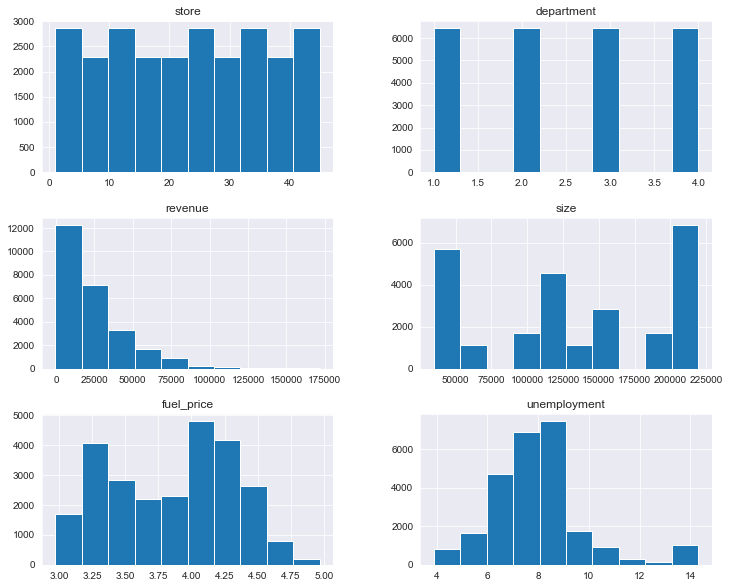

In [61]:
fig, ax = plt.subplots(figsize=(12, 10))
df.hist(ax=ax)
plt.show()

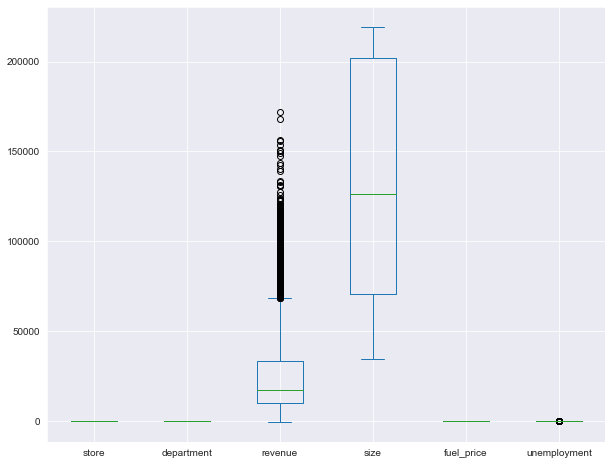

In [62]:
df.plot.box(figsize=(10,8))
plt.show()

In [63]:
#filtering for COO requests
df['date'] = pd.to_datetime(df['date'])
df_filtered = df[(df['type'] == 'C') & (df['department'].isin([1, 2])) & (df['date'].dt.year == 2018)]

In [79]:
df_filtered.head(2)

,store,department,date,revenue,type,size,fuel_price,unemployment,holiday
16688,30,1,2018-01-06,6772.77,C,42788,3.657,7.057,False
16689,30,1,2018-01-13,7457.75,C,42788,3.761,7.057,False


In [65]:
df_filtered.describe()

,store,department,revenue,size,fuel_price,unemployment
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,39.000000,1.500000,11432.222151,40341.666667,4.206186,7.907585
std,4.765572,0.500485,4990.603104,1191.671368,0.311682,1.992715
min,30.000000,1.000000,4271.300000,39490.000000,3.547000,5.217000
25%,37.000000,1.000000,8018.845000,39490.000000,4.006000,6.623000
50%,40.000000,1.500000,10420.370000,39710.000000,4.188000,7.170000
75%,43.000000,2.000000,15285.677500,40862.000000,4.377000,9.575000
max,44.000000,2.000000,70412.010000,42788.000000,4.968000,12.187000


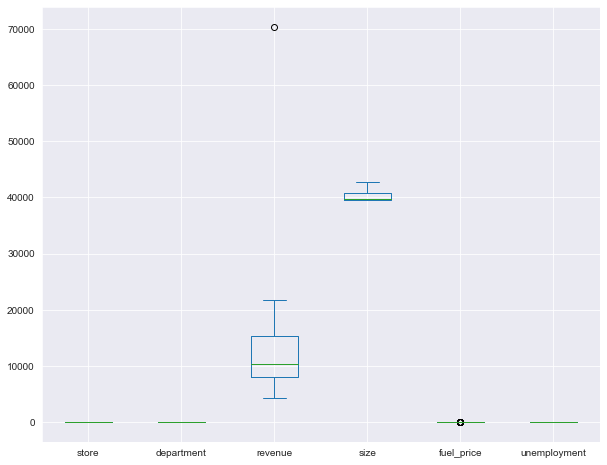

In [66]:
df_filtered.plot.box(figsize=(10,8))
plt.show()

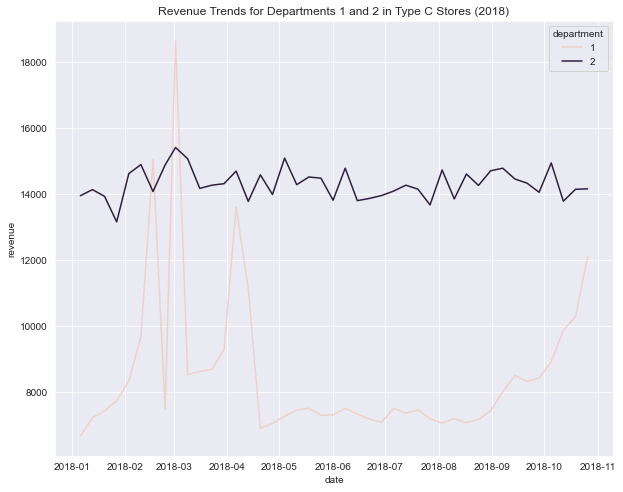

In [67]:
plt.subplots(figsize=(10, 8))
sns.lineplot(data=df_filtered, x='date', y='revenue', hue='department', ci=None)
plt.title('Revenue Trends for Departments 1 and 2 in Type C Stores (2018)')
plt.savefig("rev12c2018.jpeg")
plt.show()

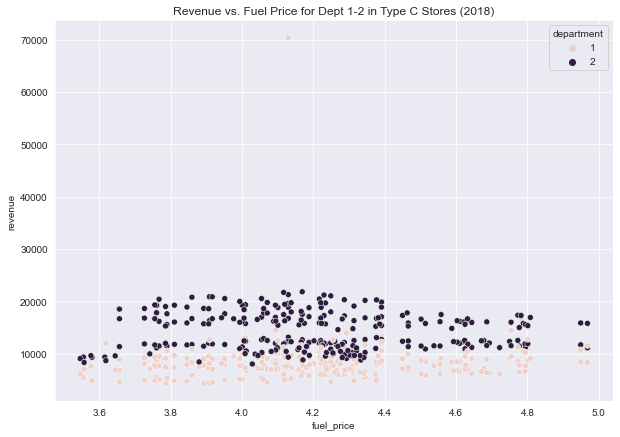

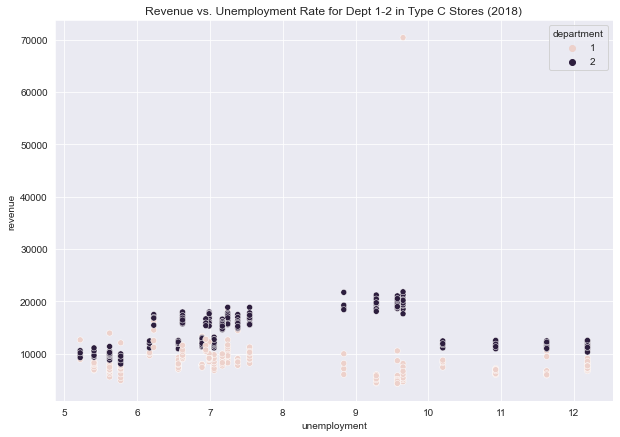

In [69]:
plt.subplots(figsize=(10, 7))
sns.scatterplot(data=df_filtered, x='fuel_price', y='revenue', hue='department')
plt.title('Revenue vs. Fuel Price for Dept 1-2 in Type C Stores (2018)')
plt.savefig("revfuel12c2018.jpeg")
plt.show()

plt.subplots(figsize=(10, 7))
sns.scatterplot(data=df_filtered, x='unemployment', y='revenue', hue='department')
plt.title('Revenue vs. Unemployment Rate for Dept 1-2 in Type C Stores (2018)')
plt.savefig("revunem12c2018.jpeg")
plt.show()

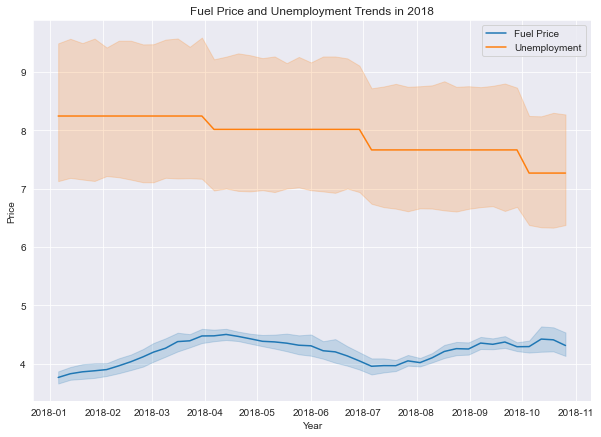

In [70]:
#looking at fuel prices and unemployment throughout 2018
fig, ax = plt.subplots(figsize=(10, 7))

sns.lineplot(data=df_filtered, x='date', y='fuel_price', label='Fuel Price', ax=ax)
sns.lineplot(data=df_filtered, x='date', y='unemployment', label='Unemployment', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_title('Fuel Price and Unemployment Trends in 2018')
plt.savefig("fuelunem2018.jpeg")
plt.show()

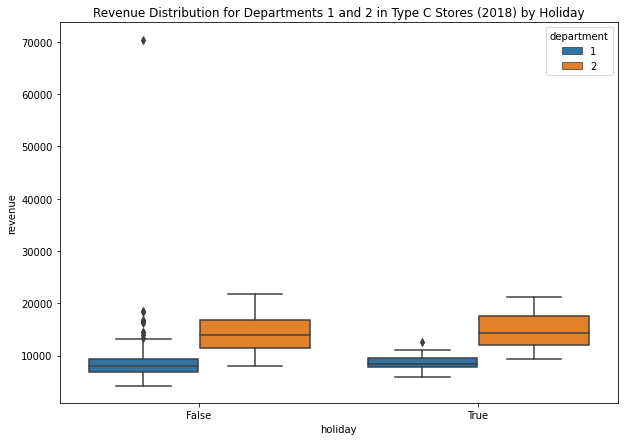

In [33]:
plt.subplots(figsize=(10, 7))
sns.boxplot(data=df_filtered, x='holiday', y='revenue', hue='department')
plt.title('Revenue Distribution for Departments 1 and 2 in Type C Stores (2018) by Holiday')
plt.show()

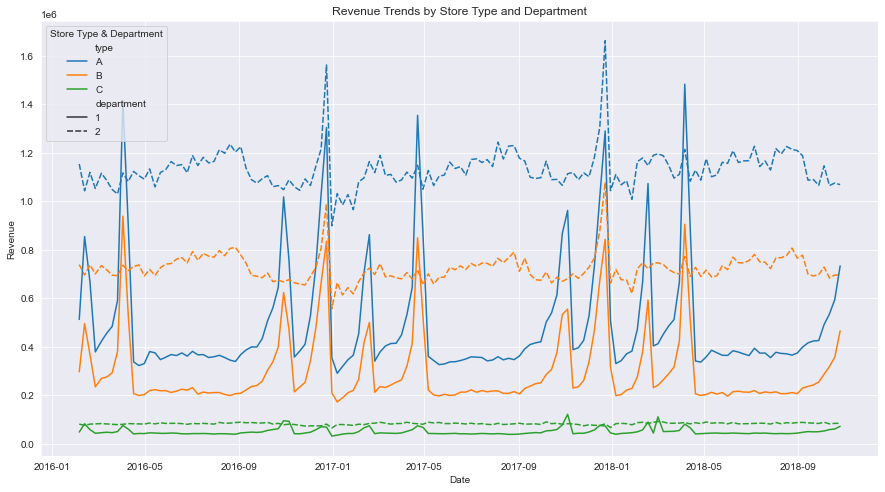

In [75]:
#filtering for department 1 and 2
df_filt = df[(df['department'] == 1) | (df['department'] == 2)]

grouped_data = df_filt.groupby(['date', 'type', 'department'])['revenue'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(data=grouped_data, x='date', y='revenue', hue='type', style='department', palette='tab10')
plt.title("Revenue Trends by Store Type and Department")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend(title="Store Type & Department", loc='upper left')
plt.savefig("alltrends.jpeg")
plt.show()

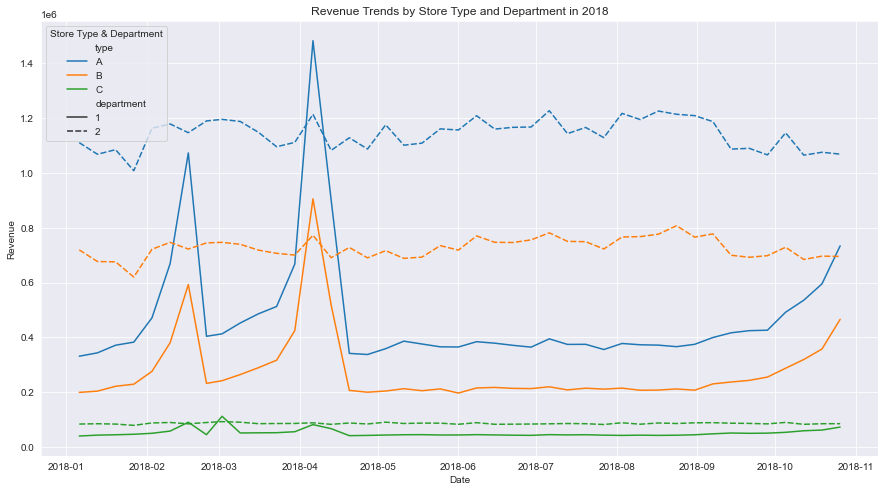

In [76]:
#filtering for departments 1 and 2 and for 2018
df['date'] = pd.to_datetime(df['date'])

df_filt = df[((df['department'] == 1) | (df['department'] == 2)) & (df['date'].dt.year == 2018)]

grouped_data = df_filt.groupby(['date', 'type', 'department'])['revenue'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(data=grouped_data, x='date', y='revenue', hue='type', style='department', palette='tab10')
plt.title("Revenue Trends by Store Type and Department in 2018")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend(title="Store Type & Department", loc='upper left')
plt.savefig("2018trends.jpeg")
plt.show()

In [48]:
#assessing if there is a significant difference in rev generation between the 2 departments in 2018
df_filtered = df[(df['type'] == 'C') & ((df['department'] == 1) | (df['department'] == 2))]

dept_1_revenue = df_filtered[df_filtered['department'] == 1]['revenue']
dept_2_revenue = df_filtered[df_filtered['department'] == 2]['revenue']

t_stat, p_value = stats.ttest_ind(dept_1_revenue, dept_2_revenue)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -29.88218259291491
p-value: 2.7499384208877426e-158


In [49]:
#assessing if there is correlation between fuel price/unemployment and rev
corr_fuel = df_filtered['revenue'].corr(df_filtered['fuel_price'])
corr_unemployment = df_filtered['revenue'].corr(df_filtered['unemployment'])

print("Correlation between revenue and fuel price:", corr_fuel)
print("Correlation between revenue and unemployment:", corr_unemployment)

Correlation between revenue and fuel price: -0.029327320270106302
Correlation between revenue and unemployment: -0.10754314709209685
